In [6]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button
from keras.preprocessing.image import ImageDataGenerator
from sklearn.manifold import TSNE

# Load features 2d
grouped = np.load('features_clip_val.npy', allow_pickle=True)

features_val, labels_val, filenames = zip(*grouped)

features_val = np.array(features_val)
labels_val = np.array(labels_val)
filenames = np.array(filenames)

print(features_val.shape)

# Reduce dimensionality
features_2d = TSNE(n_components=2).fit_transform(features_val)
print(features_2d.shape)



(48636, 1024)
(48636, 2)


In [7]:
# Save features 3d
np.save('features_clip_2d_val.npy', features_2d)

In [2]:
import os

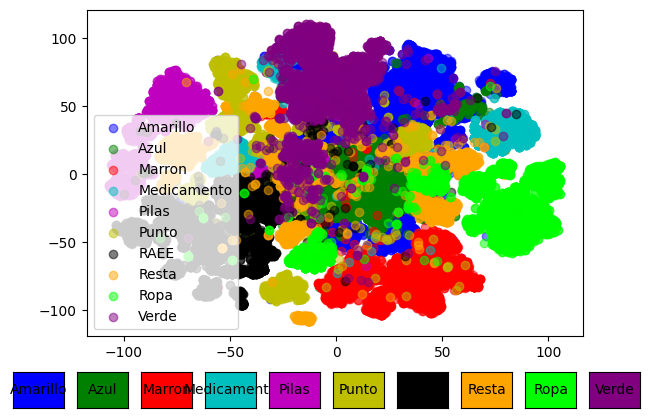

In [9]:

# Plot scatter plot
fig = plt.figure()
ax = fig.add_subplot(111)
plt.subplots_adjust(bottom=0.2)

colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'orange', 'lime', 'purple']

y_true = labels_val
labels = y_true
classes_names = os.listdir('Final_dataset_small/Validation')
scatter_plots = []

# Show clases names in legend and create button to show/hide classes
for i in range(len(classes_names)):
    idx = labels == i
    sc = ax.scatter(features_2d[idx, 0], features_2d[idx, 1], c=colors[i], label=classes_names[i], alpha=0.5)
    scatter_plots.append(sc)

ax.legend()

def on_button_click(event):
    for idx, button in buttons.items():
        if button.ax == event.inaxes:
            label = idx
            break
    sc = scatter_plots[label]
    sc.set_visible(not sc.get_visible())  # Muestra u oculta la clase
    plt.draw()

# Crea los botones para mostrar y ocultar las clases
buttons = {}
for i in range(10):
    button_ax = plt.axes([0.01 + i * 0.1, 0.05, 0.08, 0.075])
    button = Button(button_ax, classes_names[i], color=colors[i], hovercolor='0.7')
    button.on_clicked(on_button_click)
    buttons[i] = button

plt.show()